# MNIST Dataset number generation using GANs


In GAN, the first net is called Generator Net(G), and the second net called Discriminator Net(D).

The generator generates images and the discriminator classifies real and fake images.
- We will be building 2 networks **Generator** and **Discriminator** that compete against each other.

<img src="imgs/mnist_GAN.png">

### Importing the necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Yodin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Importing the MNIST numbers dataset

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../03-Convolutio

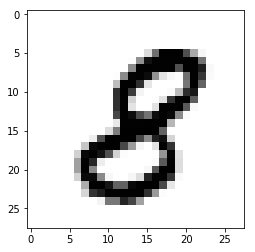

In [3]:
plt.imshow(mnist.train.images[5].reshape(28,28),cmap='Greys');

---
 ## Basic Workflow
<img src="imgs/GAN_workflow.png">

#### We will begin by creating the Generator and then move on to the Discriminator. For both of them we will be creating a variable scope.

## The Generator

---
- Produces fake data from the noise/ latent sample. 
- The input to the generator is a series of randomly generated numbers called **latent sample.** 
- Once trained, the generator learns to mimic the images to produce similar images from latent samples making it hard for the discriminator.

<img src="imgs/generator_latent.png">



In [4]:
from IPython.display import HTML
HTML('<img src="./imgs/training.gif">')

# The Discriminator
---
- A classifier trained using the supervised learning. It classifies whether an image is real (1) or not (0). 
- We train the discriminator using both the MNIST images and the images generated by the generator.

- If the input image is from the MNIST database, the discriminator should classify it as real(1).

<img src="imgs/discriminator_real.png">

- If the input image is from the generator, the discriminator should classify it as fake(0).

<img src="imgs/discriminator_fake.png">

- The discriminator is simple a fully connected neural network.
- The last activation is sigmoid to tell us the probability of whether the input image is **real or not.** So, the output can be any value between 0 and 1.

The discriminator network is almost exactly the same as the generator network, except that we're using a sigmoid output layer.



# Create the generator

In [5]:
def generator(z,reuse=None): 
    """Here, z: Random noise/ Latent sample"""
    with tf.variable_scope('gen',reuse=reuse): # allow you to have subset of architecture
        hidden1 = tf.layers.dense(inputs=z,units=128)
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        output = tf.layers.dense(hidden2,units=784,activation=tf.nn.tanh) # hyperbolic tangent(-1,1) is better than sigmoid 
        return output
    

# Create the discriminator



In [6]:
def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=X,units=128)
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1, hidden1)
        
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2, hidden2)
        logits = tf.layers.dense(hidden2,units=1)
        output = tf.sigmoid(logits) #to get probability of output being real or fake
    
        return output, logits

# Define the inputs

In [7]:
def model_inputs():
    inputs_real = tf.placeholder(tf.float32, [None, 784], name='input_real') # None(defined by how big the batch is),28x28 = 784pixels
    inputs_z = tf.placeholder(tf.float32, [None, 100], name='input_z')
    return inputs_real, inputs_z

# Initializing variables

In [8]:
# Create our input placeholders
input_real, input_z = model_inputs()

** Passing in random noise to the generator **

In [9]:
G = generator(input_z) 

**Passing in real data to the Discriminator**

In [10]:
D_output_real , D_logits_real = discriminator(input_real)

**Passing in fake data from the Generator to the Discriminator**

In [11]:
D_output_fake, D_logits_fake = discriminator(G,reuse=True)

---
# Define the loss function
We will be using sigmoid cross-entropy with logits. It measures the probability error in discrete classification tasks in which each class is independent and not mutually exclusive. 
In binary classification, where the number of classes M equals 2, cross-entropy can be calculated as:
$$−(ylog(p)+(1−y)log(1−p))$$
where, 

       y = binary indicator (0 or 1)

       p = predicted probability
       
       

In [12]:
def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

In [13]:
D_real_loss = loss_func(D_logits_real,tf.ones_like(D_logits_real)* 0.9)

In [14]:
D_fake_loss = loss_func(D_logits_fake,tf.zeros_like(D_logits_real))

In [15]:
D_loss = D_real_loss + D_fake_loss

In [16]:
G_loss = loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

# Define the Optimizers

In [17]:
learning_rate = 0.001

In [18]:
tvars = tf.trainable_variables()

d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

print([v.name for v in d_vars])
print([v.name for v in g_vars])

['dis/dense/kernel:0', 'dis/dense/bias:0', 'dis/dense_1/kernel:0', 'dis/dense_1/bias:0', 'dis/dense_2/kernel:0', 'dis/dense_2/bias:0']
['gen/dense/kernel:0', 'gen/dense/bias:0', 'gen/dense_1/kernel:0', 'gen/dense_1/bias:0', 'gen/dense_2/kernel:0', 'gen/dense_2/bias:0']


In [19]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=g_vars)

# Create the Training Session

In [20]:
batch_size = 100
epochs = 10
init = tf.global_variables_initializer()
saver = tf.train.Saver(var_list=g_vars)

In [21]:
# Save a sample per epoch
samples = []

In [22]:
with tf.Session() as sess:
    
    sess.run(init)
    
    # Recall an epoch is an entire run through the training data
    for e in range(epochs):
        # // indicates classic division
        num_batches = mnist.train.num_examples // batch_size 
        
        for i in range(num_batches):
            
            # Grab batch of images
            batch = mnist.train.next_batch(batch_size)
            
            # Get images, reshape and rescale to pass to D(tanh)
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images*2 - 1
            
            # Z (random latent noise data for Generator)
            # -1 to 1 because of tanh activation
            batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
            
            # Run optimizers, no need to save outputs, we won't use them
            _ = sess.run(D_trainer, feed_dict={input_real: batch_images, input_z: batch_z})
            _ = sess.run(G_trainer, feed_dict={input_z: batch_z})
        
            
        print("Currently on Epoch {} of {} total...".format(e+1, epochs))
        
        # Sample from generator as we're training for viewing afterwards
        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(input_z ,reuse=True),feed_dict={input_z: sample_z})
        
        samples.append(gen_sample)
        
#         saver.save(sess, './models/500_epoch_model.ckpt')

Currently on Epoch 1 of 10 total...
Currently on Epoch 2 of 10 total...
Currently on Epoch 3 of 10 total...
Currently on Epoch 4 of 10 total...
Currently on Epoch 5 of 10 total...
Currently on Epoch 6 of 10 total...
Currently on Epoch 7 of 10 total...
Currently on Epoch 8 of 10 total...
Currently on Epoch 9 of 10 total...
Currently on Epoch 10 of 10 total...


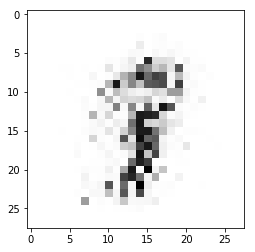

In [23]:
plt.imshow(samples[9].reshape(28,28), cmap = 'Greys')

**The above network has been trained for only 10 epochs and thus the distorted image. Genreally, GANs take a lot of time to train, practically upto about 500 epochs inorder to generate good images.** 

**You are free to try out changing the hyperparameters and try generating good, crisper images from the generator inorder to mimic the actual MNIST dataset.**

### Great Job!